# Titanic Survival Prediction
## Introduction

In this project, we aim to predict the survival of passengers on the Titanic using various machine learning models such as:
* K-nearest neighbours,
* SVM,
* Linear SVC,
* Decision tree,
* Logistic regrrssion.

We will explore the dataset, perform feature engineering, and evaluate multiple models to identify the best-performing model.

## Notebook Contents

1. Data Overview
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Building and Evaluation
6. Model Tuning with GridSearchCV
7. Conclusions 

## Data Overview

The dataset contains information about the passengers on the Titanic, including:

- **Survived**: Survival (0 = No; 1 = Yes)
- **Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **Name**: Name of the passenger
- **Sex**: Sex
- **Age**: Age in years
- **SibSp**: Number of siblings/spouses aboard the Titanic
- **Parch**: Number of parents/children aboard the Titanic
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)




In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
test = pd.read_csv(r'test.csv')
train = pd.read_csv(r'train.csv')

test_shape = test.shape
train_shape = train.shape

print(f'test shape: {test_shape}')
print(f'train shape: {train_shape}')



test shape: (418, 11)
train shape: (891, 12)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data cleaning

In [6]:
mean_age_female = train[train['Sex'] == 'female']['Age'].mean().round(0)
mean_age_male = train[train['Sex'] == 'male']['Age'].mean().round(0)

train.loc[(train['Age'].isnull()) & (train['Sex'] == 'female'), 'Age'] = mean_age_female
train.loc[(train['Age'].isnull()) & (train['Sex'] == 'male'), 'Age'] = mean_age_male

test.loc[(test['Age'].isnull()) & (test['Sex'] == 'female'), 'Age'] = mean_age_female
test.loc[(test['Age'].isnull()) & (test['Sex'] == 'male'), 'Age'] = mean_age_male

train.drop('Cabin', axis = 1, inplace= True)
test.drop('Cabin', axis = 1, inplace= True)

train.dropna(subset = 'Embarked', inplace=True)
test.dropna(subset = 'Fare', inplace=True)

In [7]:
train.isnull().sum()
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

In [9]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/1585745721.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index, y=distribution.values,  palette = "deep")


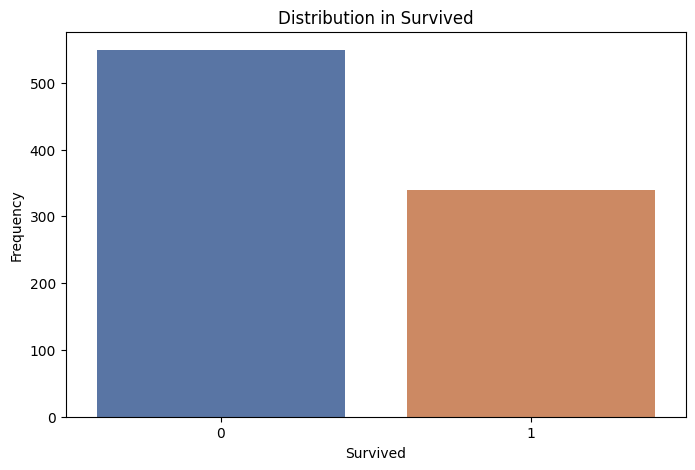

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/1585745721.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index, y=distribution.values,  palette = "deep")


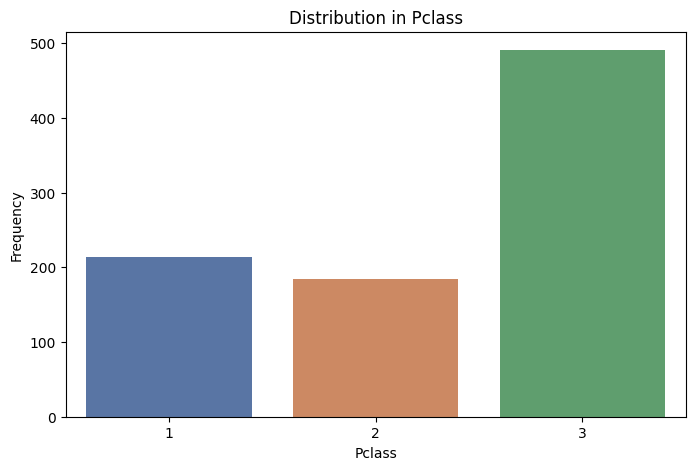

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/1585745721.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index, y=distribution.values,  palette = "deep")


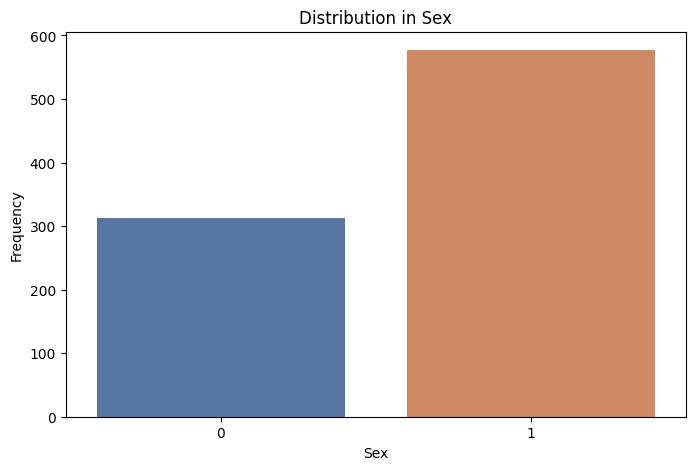

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/1585745721.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=10,  palette = "deep")


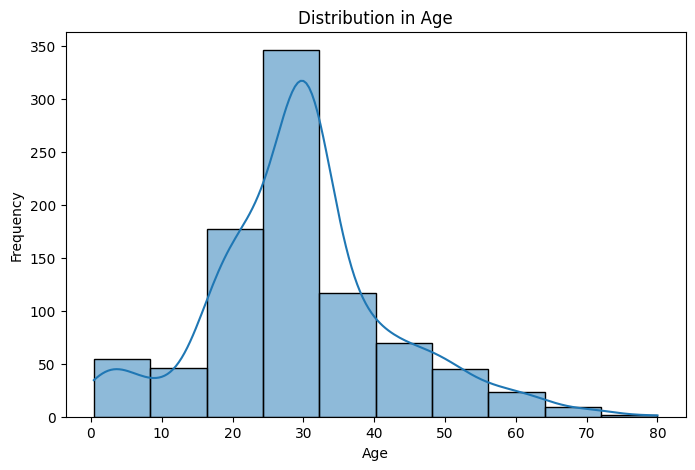

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/1585745721.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index, y=distribution.values,  palette = "deep")


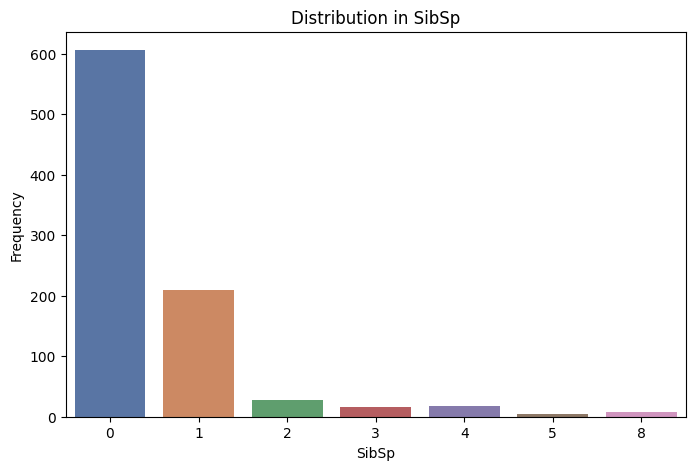

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/1585745721.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index, y=distribution.values,  palette = "deep")


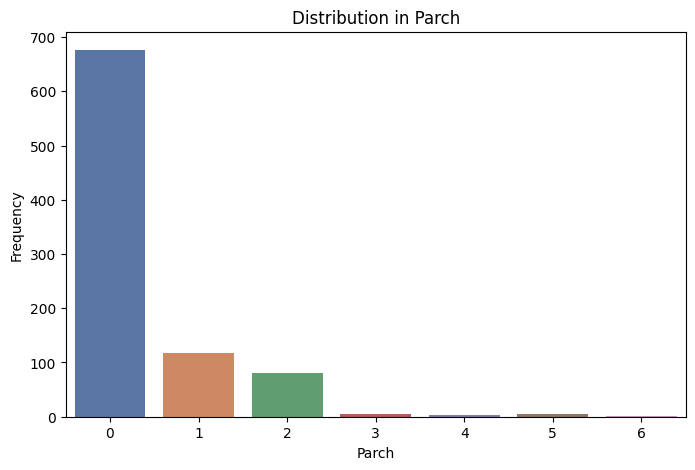

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/1585745721.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=10,  palette = "deep")


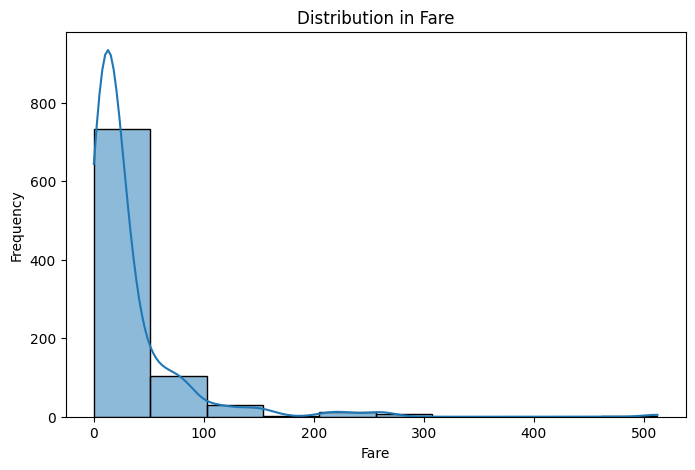

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/1585745721.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index, y=distribution.values,  palette = "deep")


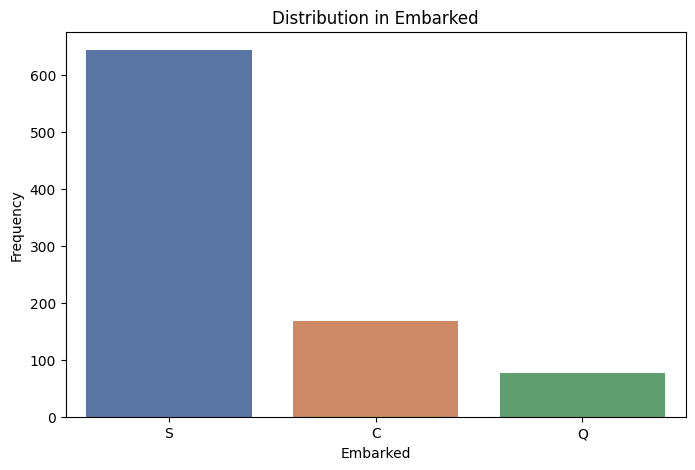

In [10]:
def plot_distribution(df):
    for col in df.columns:
        plt.figure(figsize=(8, 5))
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            distribution = df[col].value_counts()
            sns.barplot(x=distribution.index, y=distribution.values,  palette = "deep")
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.title(f'Distribution in {col}')
            plt.show()
        else:
            sns.histplot(df[col], kde=True, bins=10,  palette = "deep")
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.title(f'Distribution in {col}')
            plt.show()
            
plot_distribution(train.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace = False))

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/4221139072.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


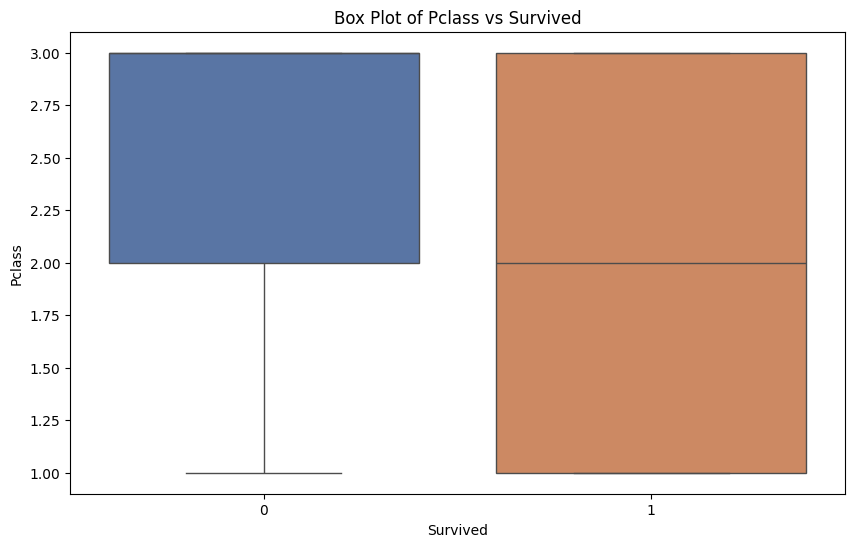

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/4221139072.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


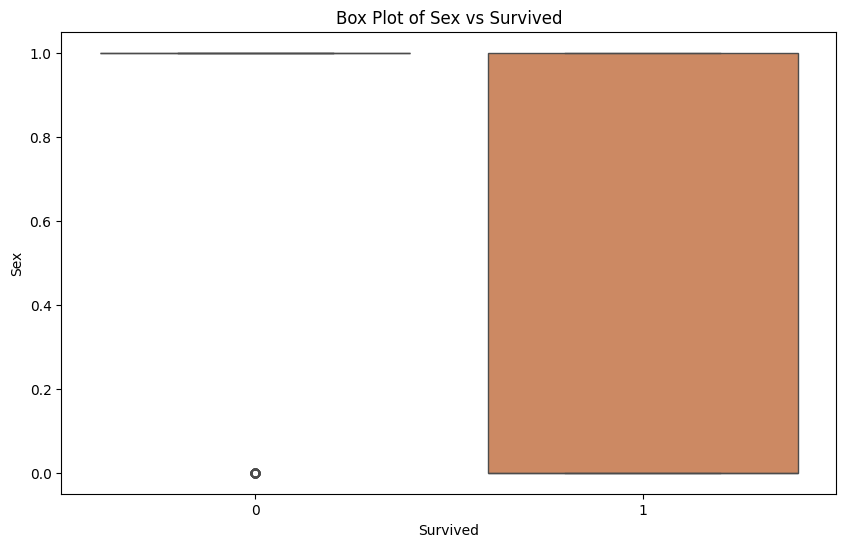

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/4221139072.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


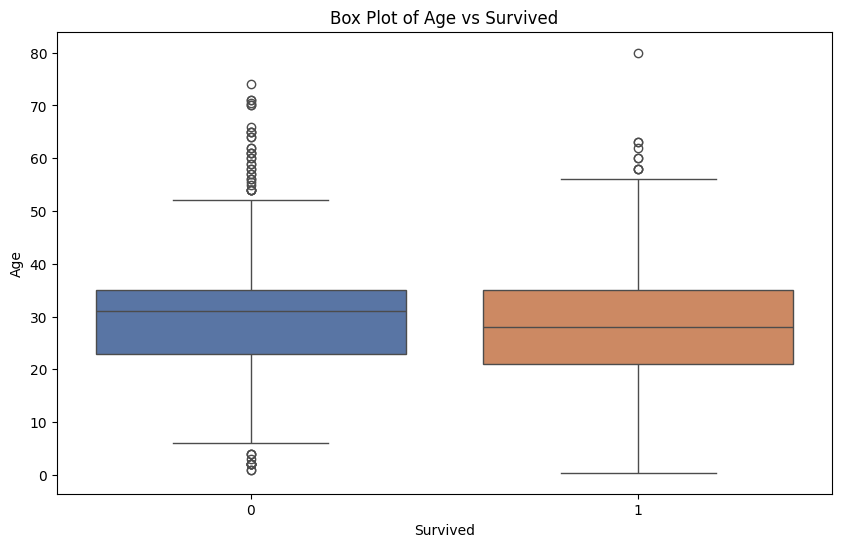

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/4221139072.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


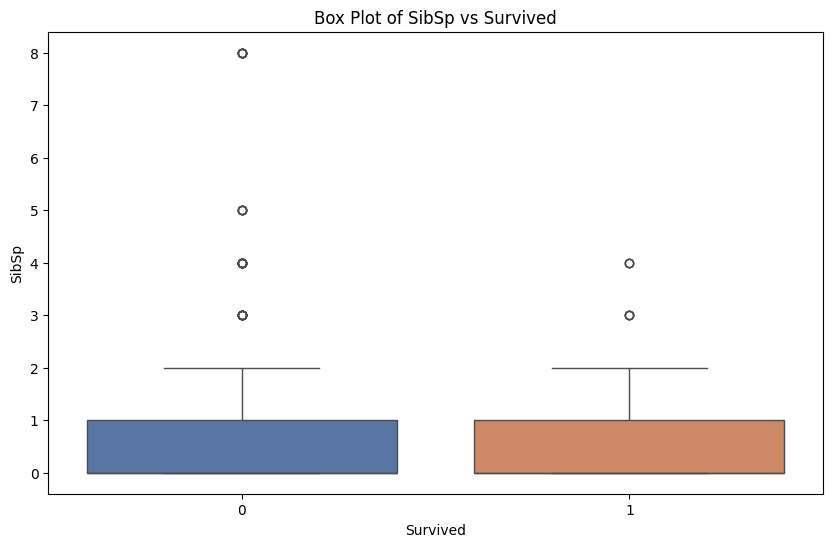

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/4221139072.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


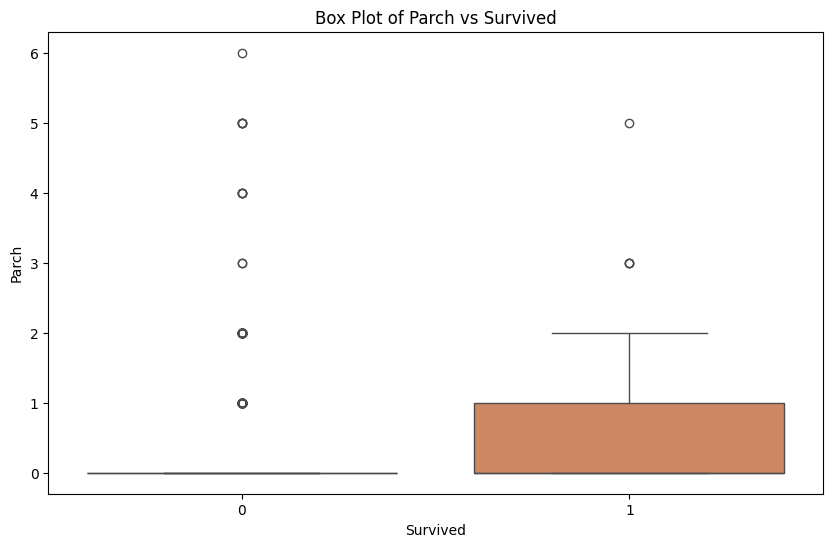

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/4221139072.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


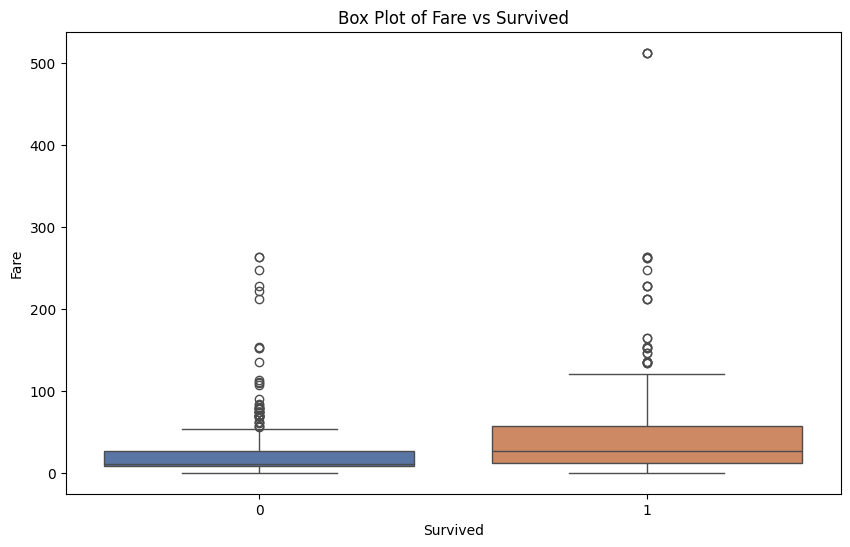

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_77210/4221139072.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


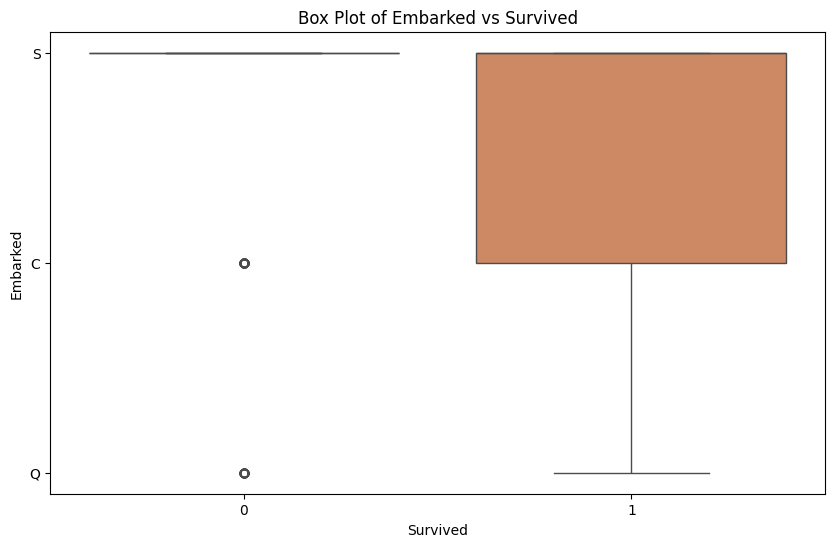

In [11]:
def plot_boxplots(df, x_col):
    if x_col not in df.columns:
        raise ValueError(f"Kolumna {x_col} nie istnieje w DataFrame.")
    
    y_cols = [col for col in df.columns if col != x_col] 
    
    for y_col in y_cols:
        plt.figure(figsize=(10, 6))
        if df[x_col].dtype == 'object' or df[x_col].nunique() < 10:
            df[x_col] = df[x_col].astype('category')
        
        sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'Box Plot of {y_col} vs {x_col}')
        plt.show()

plot_boxplots(train.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace = False), 'Survived')

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


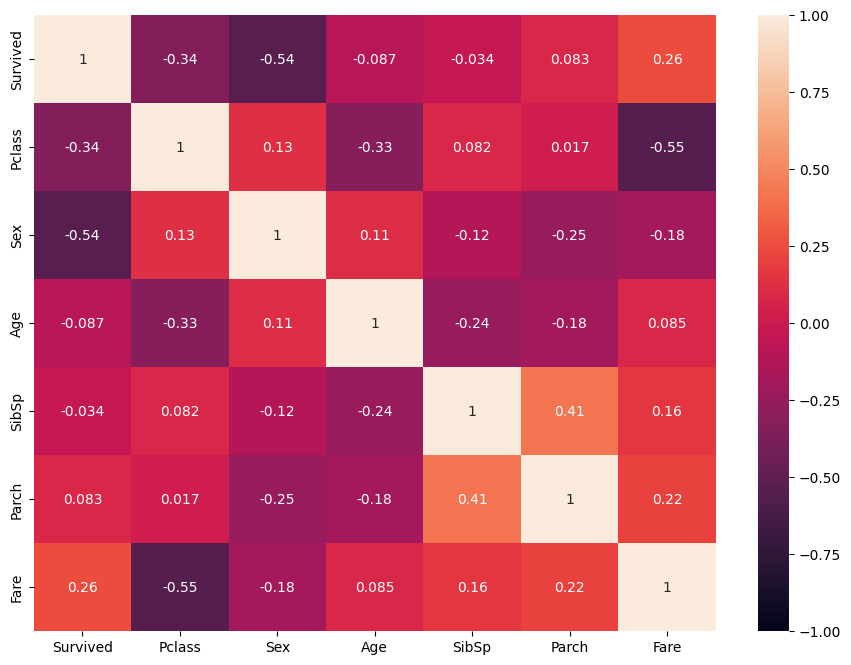

In [13]:
correlation = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']].corr()

plt.figure(figsize=(11,8))
sns.heatmap(correlation, annot=True, vmin= -1, vmax= 1)
plt.show()


In [14]:
train.describe().round(2)
#train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.0,889.00,889.00,889.00,889.00,889.00,889.00,889.00
mean,446.0,0.38,2.31,0.65,29.73,0.52,0.38,32.10
std,257.0,0.49,0.83,0.48,12.98,1.10,0.81,49.70
min,1.0,0.00,1.00,0.00,0.42,0.00,0.00,0.00
25%,224.0,0.00,2.00,0.00,22.00,0.00,0.00,7.90
50%,446.0,0.00,3.00,1.00,30.00,0.00,0.00,14.45
75%,668.0,1.00,3.00,1.00,35.00,1.00,0.00,31.00
max,891.0,1.00,3.00,1.00,80.00,8.00,6.00,512.33


In [15]:
df_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Embarked']]

In [16]:
pd.pivot_table(train, index= 'Survived', values= ['Age', 'SibSp', 'Parch', 'Fare']).round(2)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.62,22.12,0.33,0.55
1,28.30,48.21,0.47,0.48


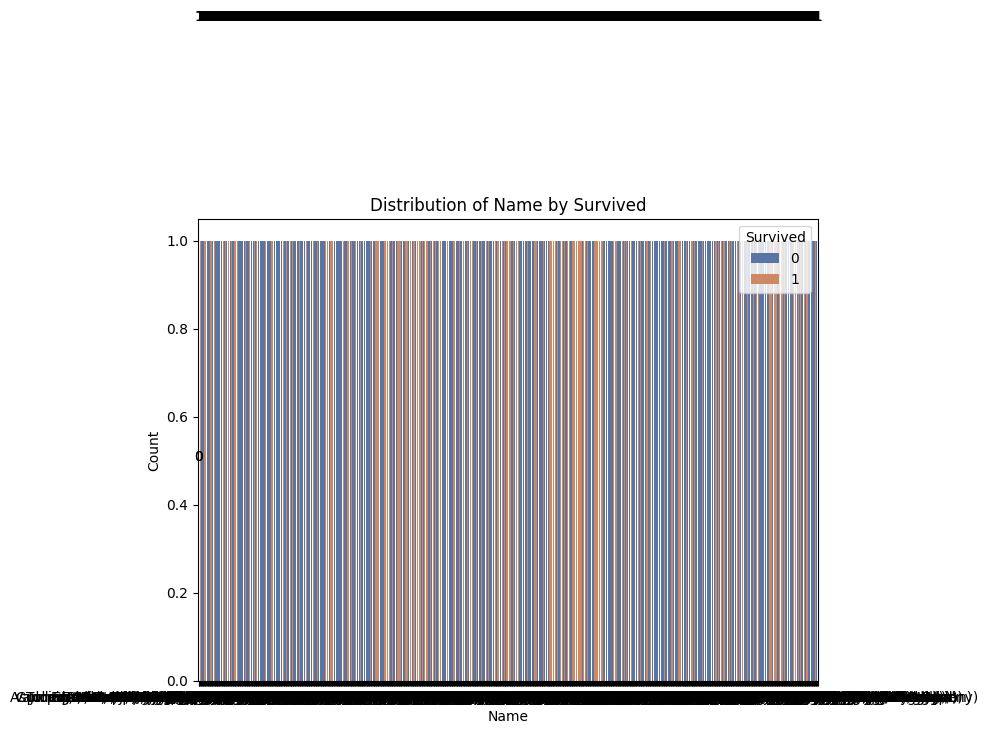

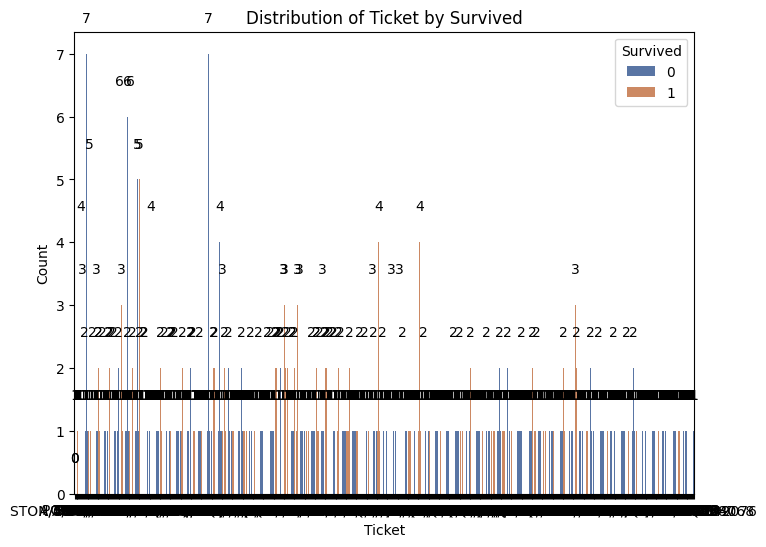

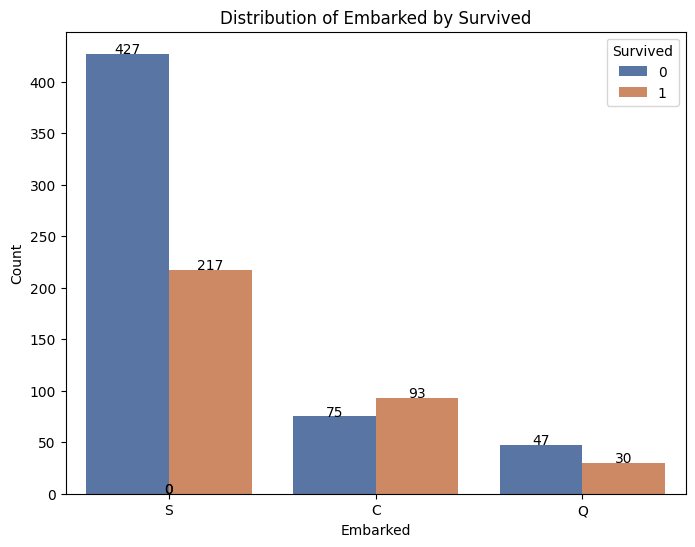

In [17]:

def plot_categorical_distribution(df, target_column):
    def addlabels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, int(height), ha='center')

    # Check if the target column exists in the dataframe
    if target_column not in df.columns:
        raise ValueError(f"The target column '{target_column}' does not exist in the DataFrame.")
    
    # Loop through each column in the DataFrame
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':  # Check if the column is categorical
            plt.figure(figsize=(8, 6))
            ax = sns.countplot(x=df[col], hue=df[target_column], palette="deep")
            addlabels(ax.patches)
            plt.title(f'Distribution of {col} by {target_column}')
            plt.ylabel('Count')
            plt.xlabel(col)
            plt.legend(title=target_column, labels=df[target_column].unique())
            plt.show()

# Usage example:
plot_categorical_distribution(train, 'Survived')


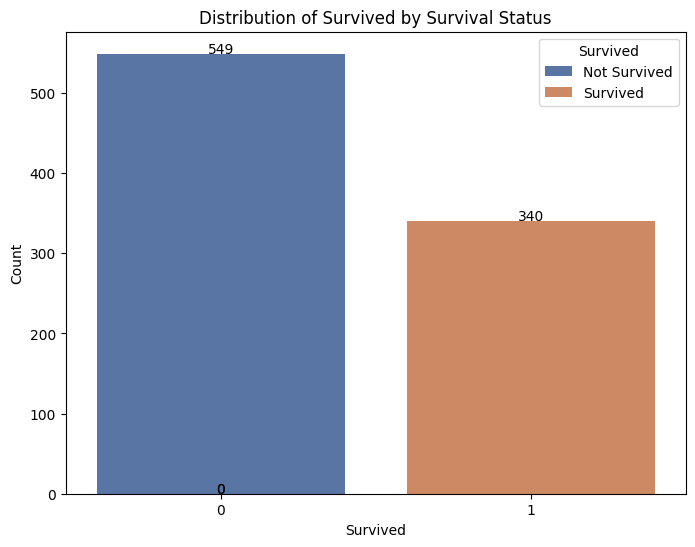

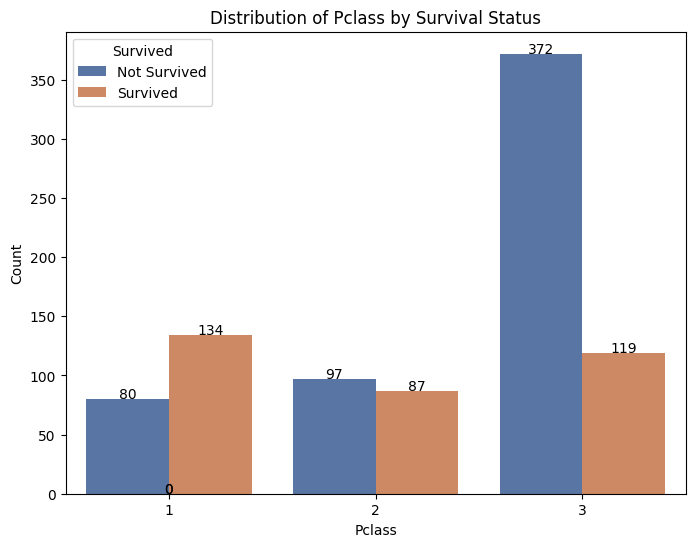

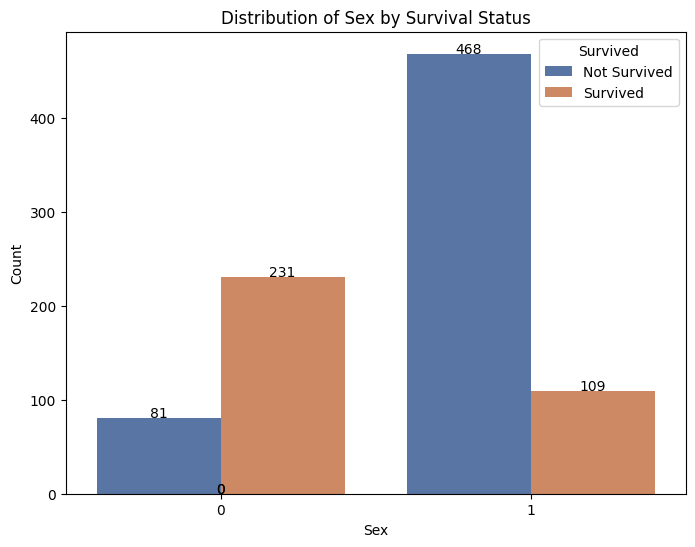

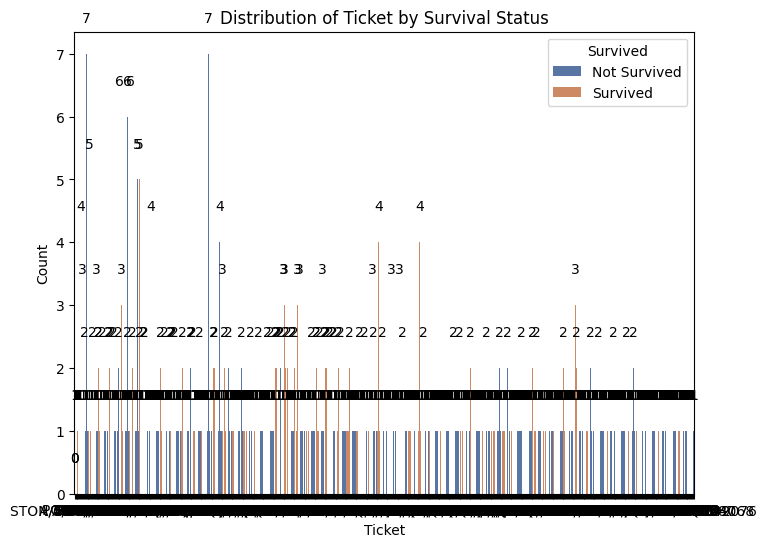

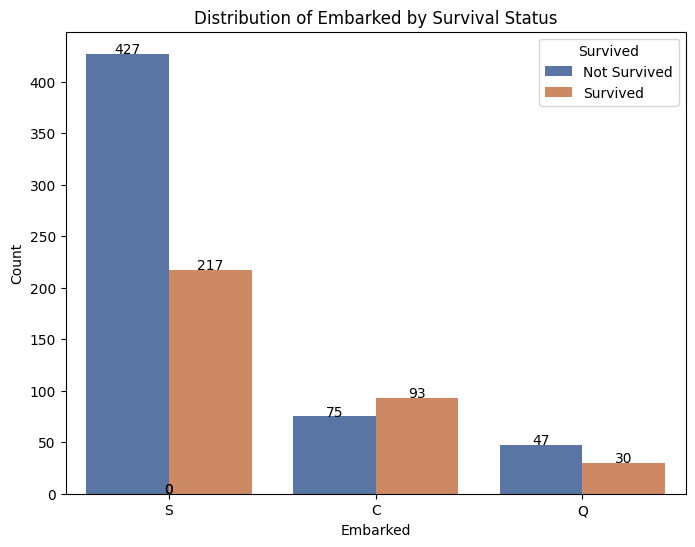

In [18]:
def addlabels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, int(height), ha='center')


for i in df_cat.columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=df_cat[i], hue=train['Survived'], palette="deep")
    addlabels(ax.patches)
    plt.title(f'Distribution of {i} by Survival Status')
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
    plt.show()

In [19]:
def split_name_title(df):
    df['Name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
    df['Name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
    return df

train = split_name_title(train)
test = split_name_title(test)
train['Name_title'].value_counts()

Name_title
Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [20]:
def process_name_title(df):
    df['Name_title'] = df['Name_title'].replace(
        ['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], "Other")
    df['Name_title'] = df['Name_title'].replace('Mlle', 'Miss')
    df['Name_title'] = df['Name_title'].replace('Ms', 'Miss')
    df['Name_title'] = df['Name_title'].replace('Mme', 'Mrs')

    title_mapping = {'Mr':1, "Miss":2, "Mrs":3, "Master":4, "Other":5}
    df['Name_title'] = df['Name_title'].map(title_mapping)
    return df

train = process_name_title(train)
test = process_name_title(test)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,1


In [21]:
def process_embarked(df):
    embarked_mapping = {"S":1, "C":2, "Q":3}
    df['Embarked'] =  df['Embarked'].map(embarked_mapping)
    return df

train = process_embarked(train)
test = process_embarked(test)

In [22]:
def calculate_family_size(df):
    df['Family_size'] = df['SibSp'] + df['Parch'] + 1
    return df

train = calculate_family_size(train)
test = calculate_family_size(test)

In [23]:
def calculate_isAlone(df):
    df['Is_alone'] = 0 
    df.loc[df['Family_size'] == 1, 'Is_alone'] = 1
    return df

train = calculate_isAlone(train)
test = calculate_isAlone(test)

In [24]:
df_train = train.drop(columns=['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'])
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_title,Family_size,Is_alone
0,0,3,1,22.0,7.2500,1,1,2,0
1,1,1,0,38.0,71.2833,2,3,2,0
2,1,3,0,26.0,7.9250,1,2,1,1
3,1,1,0,35.0,53.1000,1,3,2,0
4,0,3,1,35.0,8.0500,1,1,1,1


In [25]:
df_test = test.drop(columns=['PassengerId','Name', 'Ticket' , 'SibSp', 'Parch'])
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Name_title,Family_size,Is_alone
0,3,1,34.5,7.8292,3,1,1,1
1,3,0,47.0,7.0000,1,3,2,0
2,2,1,62.0,9.6875,3,1,1,1
3,3,1,27.0,8.6625,1,1,1,1
4,3,0,22.0,12.2875,1,3,3,0


In [26]:
def calculate_ratio_by_column(df, target_column):
    for column in df.columns:
        if column != target_column:  
            rate = df[[column, target_column]].groupby([column], as_index=False).mean()
            display(rate)  
            print(('_ '*20))

calculate_ratio_by_column(df_train, 'Survived')

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


,Sex,Survived
0,0,0.740385
1,1,0.188908


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


,Fare,Survived
0,0.0000,0.066667
1,4.0125,0.000000
2,5.0000,0.000000
3,6.2375,0.000000
4,6.4375,0.000000
...,...,...
242,227.5250,0.750000
243,247.5208,0.500000
244,262.3750,1.000000
245,263.0000,0.500000


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


,Embarked,Survived
0,1,0.336957
1,2,0.553571
2,3,0.389610


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


,Name_title,Survived
0,1,0.156673
1,2,0.701087
2,3,0.792000
3,4,0.575000
4,5,0.347826


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


,Family_size,Survived
0,1,0.300935
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


,Is_alone,Survived
0,0,0.505650
1,1,0.300935


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


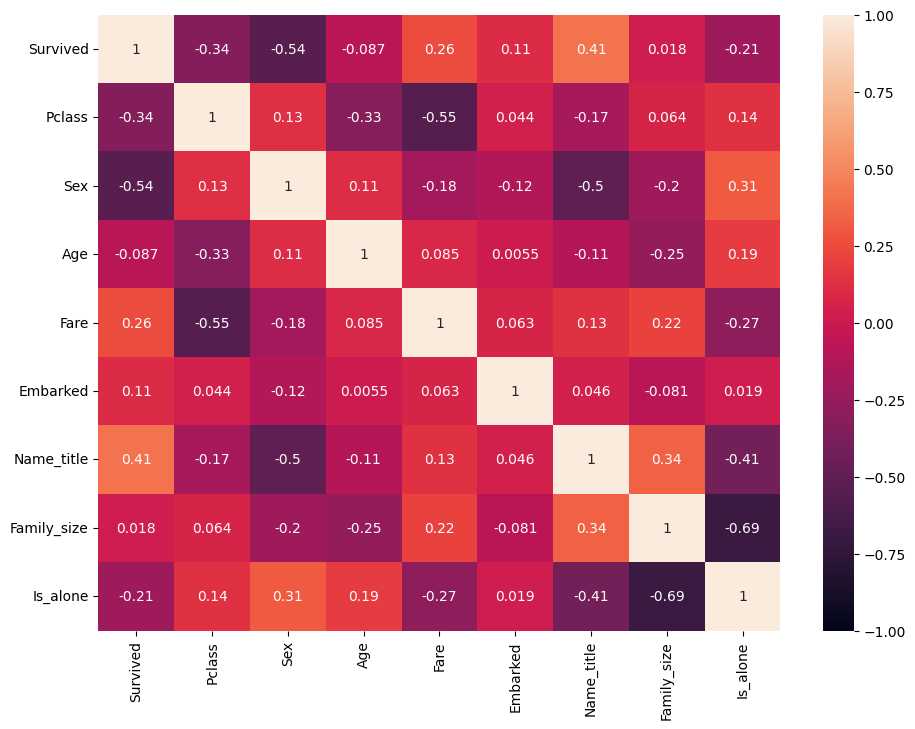

In [27]:
plt.figure(figsize=(11,8))
sns.heatmap(df_train.corr(), annot=True, vmin= -1, vmax= 1)
plt.show()

In [28]:
display(df_train.describe())
display(df_test.describe())

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_title,Family_size,Is_alone
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.733600,32.096681,1.362205,1.726659,1.906637,0.601800
std,0.486260,0.834700,0.477538,12.984146,49.697504,0.636157,1.030273,1.614703,0.489803
min,0.000000,1.000000,0.000000,0.420000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.895800,1.000000,1.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,30.000000,14.454200,1.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,3.000000,5.000000,11.000000,1.000000


,Pclass,Sex,Age,Fare,Embarked,Name_title,Family_size,Is_alone
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2.263789,0.635492,30.170264,35.627188,1.465228,1.743405,1.841727,0.604317
std,0.842077,0.481870,12.577610,55.907576,0.685961,1.006642,1.520338,0.489584
min,1.000000,0.000000,0.170000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,23.000000,7.895800,1.000000,1.000000,1.000000,0.000000
50%,3.000000,1.000000,29.000000,14.454200,1.000000,1.000000,1.000000,1.000000
75%,3.000000,1.000000,35.000000,31.500000,2.000000,2.000000,2.000000,1.000000
max,3.000000,1.000000,76.000000,512.329200,3.000000,5.000000,11.000000,1.000000


In [29]:
X = df_train.drop(columns='Survived', axis=1)
y = df_train['Survived'].copy()
X_train, X_val, y_train,  y_val = train_test_split(X , y ,test_size = 0.2, random_state=42)
X_test = df_test

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((711, 8), (711,), (178, 8), (178,), (417, 8))

In [30]:
scaler = StandardScaler()
encoder = OneHotEncoder()
scaler_features = ['Age', 'Fare']

X_train[scaler_features] = scaler.fit_transform(X_train[scaler_features])
X_val[scaler_features]  = scaler.transform(X_val[scaler_features])
X_test[scaler_features]  = scaler.transform(X_test[scaler_features])

# Model

### Logistics regression

In [31]:
logr = LogisticRegression(solver= 'liblinear')
logr.fit(X_train, y_train)
y_pred = logr.predict(X_val)

acc_logr = round(accuracy_score(y_val, y_pred) * 100, 2)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Accuracy on validation data:  {acc_logr}')
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy on validation data:  79.21
Confusion Matrix:
[[87 22]
 [15 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       109
           1       0.71      0.78      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



### Support Vector Machines

In [32]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)

acc_svc = round(accuracy_score(y_val, y_pred) * 100, 2)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Accuracy on validation data:  {acc_svc}')
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")



Accuracy on validation data:  80.9
Confusion Matrix:
[[89 20]
 [14 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.80      0.76        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.81      0.81      0.81       178



### Decision tree

In [33]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split = 5,   random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_val)

acc_decision_tree = round(accuracy_score(y_val, y_pred) * 100, 2)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Accuracy on validation data:  {acc_decision_tree}')
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy on validation data:  79.21
Confusion Matrix:
[[86 23]
 [14 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       109
           1       0.71      0.80      0.75        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.79       178
weighted avg       0.80      0.79      0.79       178



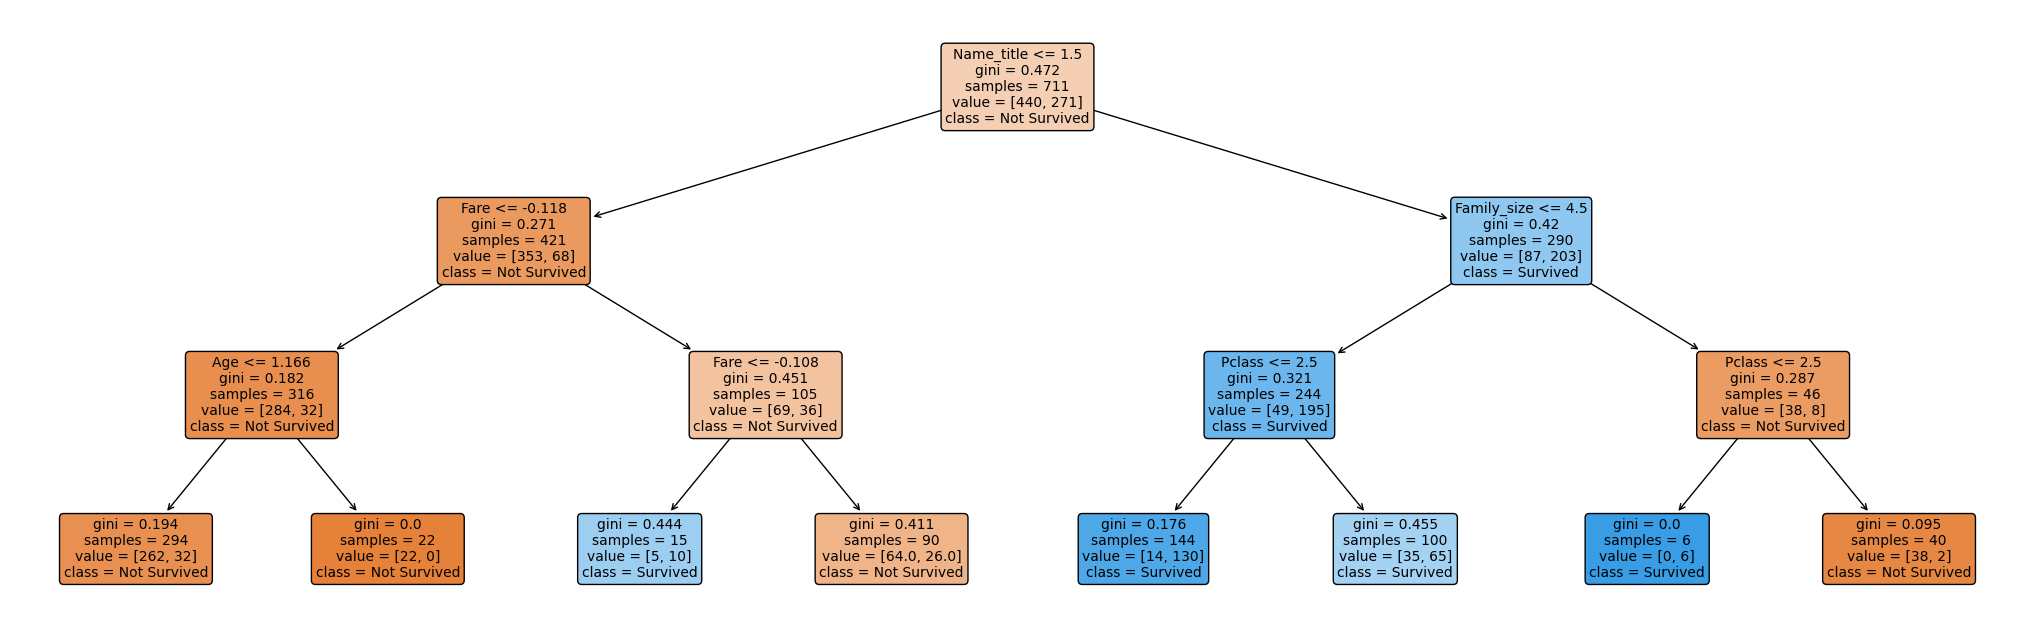

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(26,8))
plot_tree(decision_tree, 
          feature_names=X_train.columns, 
          class_names=['Not Survived', 'Survived'], 
          filled=True,  
          rounded=True,  
          fontsize=10)  
plt.show()


### Linear SVC

In [35]:
linear_scv = LinearSVC()
linear_scv.fit(X_train, y_train)
y_pred = linear_scv.predict(X_val)

acc_linear_svc = round(accuracy_score(y_val, y_pred) * 100, 2)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Accuracy on validation data:  {acc_linear_svc}')
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy on validation data:  79.78
Confusion Matrix:
[[87 22]
 [14 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       109
           1       0.71      0.80      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.80      0.80      0.80       178



/Users/franekbiskup/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/franekbiskup/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Random Forest 

In [36]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
Y_pred = rand_forest.predict(X_val)

acc_rand_forest = round(accuracy_score(y_val, y_pred) * 100, 2)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Accuracy on validation data:  {acc_rand_forest}')
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy on validation data:  79.78
Confusion Matrix:
[[87 22]
 [14 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       109
           1       0.71      0.80      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.80      0.80      0.80       178



### kNN 

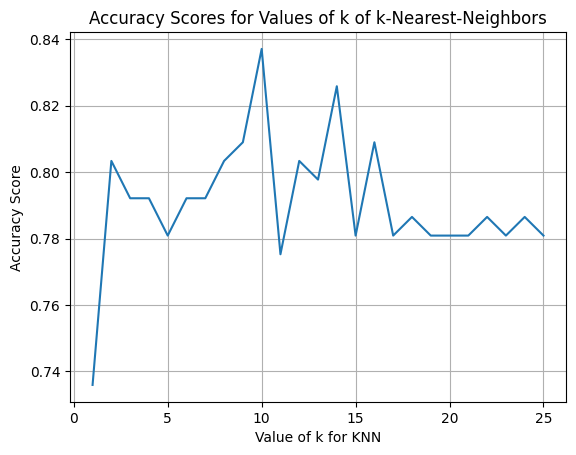

In [37]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    scores.append(metrics.accuracy_score(y_val, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.grid(True)
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

acc_knn = round(accuracy_score(y_val, y_pred) * 100, 2)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Accuracy on validation data:  {acc_knn}')
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy on validation data:  83.71
Confusion Matrix:
[[94 15]
 [14 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       109
           1       0.79      0.80      0.79        69

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



# Model evaluation

In [39]:
models = pd.DataFrame({
    'Model' : ['Logistics regression', 'Decision tree', ' SVC', 'Linear SVC', 'Random Forest', 'KNN'],
    'Validation score' : [acc_logr, acc_decision_tree, acc_svc, acc_linear_svc, acc_rand_forest, acc_knn],
})
models.sort_values(by='Validation score', ascending= False)

,Model,Validation score
5,KNN,83.71
2,SVC,80.90
3,Linear SVC,79.78
4,Random Forest,79.78
0,Logistics regression,79.21
1,Decision tree,79.21


In [40]:
param_grid = {
    'C': [0.1, 1, 10, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f'Best parameters for SVC: {grid_search.best_params_}')
best_svc_model = grid_search.best_estimator_

svc_val_score = round(best_svc_model.score(X_val, y_val) * 100, 2)
print(f'Validation accuracy after tuning: {svc_val_score}')

Best parameters for SVC: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Validation accuracy after tuning: 80.9


In [110]:
svc_scores = cross_val_score(best_svc_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores for SVC: {svc_scores}')
print(f'Mean Cross-Validation Score: {svc_scores.mean() * 100:.2f}')

Cross-Validation Scores for SVC: [0.7752809  0.73033708 0.75842697 0.76404494 0.77966102]
Mean Cross-Validation Score: 76.16


In [111]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 10, 11],      
    'weights': ['uniform', 'distance'],   
    'metric': ['euclidean', 'manhattan']  
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f'Best parameters for K-NN: {grid_search.best_params_}')
best_knn_model = grid_search.best_estimator_

knn_val_score = round(best_knn_model.score(X_val, y_val) * 100, 2)
print(f'Validation accuracy after tuning: {knn_val_score}')

72588.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
72588.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
72588.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
72588.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
72588.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
72588.66s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
72588.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
72588.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
72588.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
72588.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
72588.70s - pydevd: Sending message rela

Best parameters for K-NN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Validation accuracy after tuning: 80.34


In [112]:
knn_scores = cross_val_score(best_knn_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores for SVC: {knn_scores}')
print(f'Mean Cross-Validation Score: {knn_scores.mean() * 100:.2f}')

Cross-Validation Scores for SVC: [0.70224719 0.76404494 0.7752809  0.74719101 0.76271186]
Mean Cross-Validation Score: 75.03


In [42]:
prediction = best_svc_model.predict(X_test)

test['Survived'] = prediction
test['Survived'].value_counts()
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_title,Family_size,Is_alone,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,3,1,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,1,3,2,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,3,1,1,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1,1,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,1,3,3,0,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,1,1,1,1,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,3,2,1,1,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,1,1,3,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,2,3,1,1,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,1,1,3,0,0
